In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data=pd.read_csv("C:\\Users\\yadny\\Downloads\\Wholesale customers data.csv")
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [7]:
data.isna().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
cols=data.columns

from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X=ms.fit_transform(data)

X=pd.DataFrame(X,columns=cols)

In [9]:
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


C:\Users\yadny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


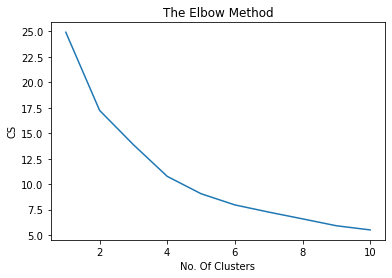

In [10]:
from sklearn.cluster import KMeans
cs=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

plt.plot(range(1,11),cs)
plt.title('The Elbow Method')
plt.xlabel('No. Of Clusters')
plt.ylabel('CS')
plt.show()

In [16]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [17]:
kmeans.inertia_

10.76666039838505

In [18]:
Labels=kmeans.labels_
data['Labels']=Labels

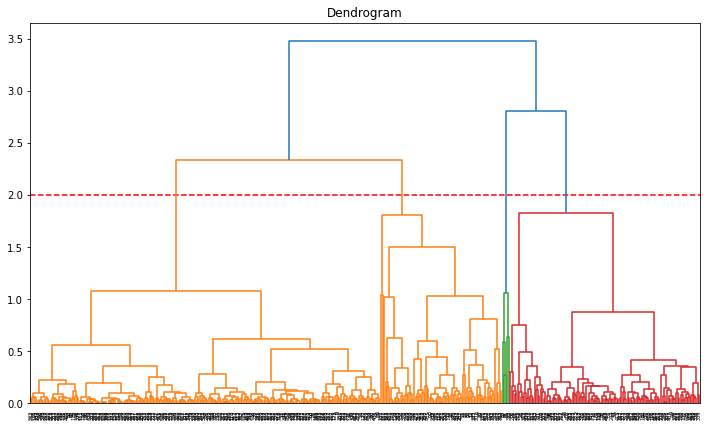

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12,7))
plt.title("Dendrogram")
plt.axhline(y=2,color='r',linestyle='--')
dend=shc.dendrogram(shc.linkage(X,method='ward'))

In [23]:
from sklearn.cluster import AgglomerativeClustering
hierarchial=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [24]:
Labels=hierarchial.fit_predict(X)
Labels

array([3, 0, 0, 1, 1, 3, 3, 0, 0, 0, 0, 3, 1, 1, 1, 3, 0, 3, 3, 3, 3, 3,
       1, 1, 1, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 3, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 3, 0, 3, 2, 0, 0, 3, 0,
       0, 1, 3, 3, 1, 1, 3, 1, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 2, 1,
       3, 1, 3, 1, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 0, 1, 3, 3, 0, 0, 3, 0,
       3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 1, 3, 3, 3, 0, 0, 0, 1, 3, 3, 0, 3, 1, 1, 0,
       3, 3, 0, 0, 1, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 1, 1, 3, 3, 0, 1, 1, 3, 3, 3, 0,
       0, 1, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 1, 3, 1, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3,